In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
!cat input_EvoSimulation.csv

In [7]:
input_data = pd.read_csv('input_EvoSimulation.csv', header=None)

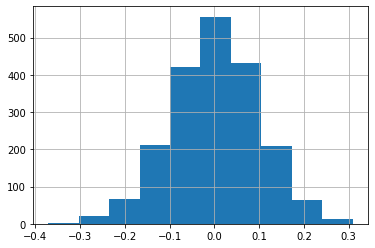

In [9]:
input_data[0].hist()

In [26]:
!python evo_simulator.py -h

usage: evo_simulator.py [-h] [-i INPUT] [-t [T_SEQ [T_SEQ ...]]]
                        [-r [READ_NUM_AVERAGE_SEQ [READ_NUM_AVERAGE_SEQ ...]]]
                        [-n [NOISE_OPTION [NOISE_OPTION ...]]] [-d DNA_COPIES]
                        [-p PCR_CYCLES] [-f FITNESS_TYPE] [-o OUTPUT_FILENAME]

Simulated competitive pooled growth of a population of genotypes with
different fitnesses

optional arguments:
  -h, --help            show this help message and exit
  -i INPUT, --input INPUT
                        a .csv file: 1st column is fitness of each genotype,
                        2nd column is initial cell number of each genotype at
                        generation 0 (default: None)
  -t [T_SEQ [T_SEQ ...]], --t_seq [T_SEQ [T_SEQ ...]]
                        time-points evaluated in number of generations
                        (default: None)
  -r [READ_NUM_AVERAGE_SEQ [READ_NUM_AVERAGE_SEQ ...]], --read_num_average_seq [READ_NUM_AVERAGE_SEQ [READ_NUM_AVERAGE_SEQ ...]]
  

In [10]:
!python evo_simulator.py -i input_EvoSimulation.csv -t 0 3 6 9 12 -r 50 50 50 50 50 -o output

In [28]:
!python pyfitseq.py -h

usage: pyfitseq.py [-h] [-i INPUT] [-t [T_SEQ [T_SEQ ...]]] [-m MAX_ITER_NUM]
                   [-k KAPPA] [-g REGRESSION_NUM] [-f FITNESS_TYPE]
                   [-o OUTPUT_FILENAME]

Estimate fitness of each genotype in a competitive pooled growth experiment

optional arguments:
  -h, --help            show this help message and exit
  -i INPUT, --input INPUT
                        a .csv file: with each column being the read number
                        per genotype at each sequenced time-point (default:
                        None)
  -t [T_SEQ [T_SEQ ...]], --t_seq [T_SEQ [T_SEQ ...]]
                        sequenced time-points in number of generations
                        (default: None)
  -m MAX_ITER_NUM, --max_iter_num MAX_ITER_NUM
                        maximum number of iterations in the optimization
                        (default: 10)
  -k KAPPA, --kappa KAPPA
                        a noise parameter that characterizes the total noise
                        in

In [15]:
!python pyfitseq.py -i output_EvoSimulation_Read_Number.csv -t 0 3 6 9 12 -o output

Iteration 1: -30360.350088112915
Iteration 2: -30087.91068989501
Iteration 3: -30096.497480618236


In [22]:
!pwd

/home/grotec/repos/PyFitSeq


In [29]:
pd.read_csv('output_EvoSimulation_Read_Number.csv', header=None)

,0,1,2,3,4
0,87,129,136,169,149
1,73,102,118,148,125
2,73,30,29,25,3
3,67,86,124,129,66
4,76,56,41,50,10
...,...,...,...,...,...
1995,75,106,123,121,99
1996,74,72,51,28,9
1997,68,99,93,135,85
1998,51,54,65,73,44


In [30]:
!head output_EvoSimulation_Read_Number.csv

87,129,136,169,149
73,102,118,148,125
73,30,29,25,3
67,86,124,129,66
76,56,41,50,10
66,61,46,30,20
85,47,36,37,8
94,91,82,117,60
62,103,94,111,69
103,86,156,163,145


(-0.5, 0.5)

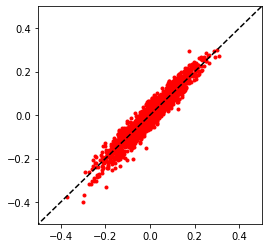

In [31]:


x_true = np.array(pd.read_csv('output_EvoSimulation_Input_Log.csv')['Fitness'], dtype=float)
x_estimate = np.array(pd.read_csv('output_FitSeq.csv')['Estimated_Fitness'], dtype=float)

fig = plt.figure(figsize=(4,4))
plt.plot(x_true, x_estimate, '.', color='r')
plt.plot([-1,1], [-1,1], '--', color='k')

plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)


In [32]:
x_estimate.shape

(2000,)

In [17]:
!python evo_simulator.py -i input_EvoSimulation.csv -t 0 2 4 6 8 -r 75 75 75 75 50 -n DNA_extraction PCR sequencing -d 300 -p 27 -f w -o output


In [18]:
! python pyfitseq.py -i output_EvoSimulation_Read_Number2.csv -t 0 2 6 8 -m 12 -k 2 -g 3 -f w -o output

Iteration 1: -23353.280483799324
Iteration 2: -23350.021646627974
Iteration 3: -23347.89344832278
Iteration 4: -23346.65688852728
Iteration 5: -23346.1241334946
Iteration 6: -23346.142043239837


(-0.5, 0.5)

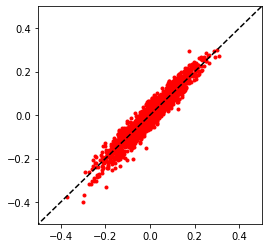

In [19]:
x_true = np.array(pd.read_csv('output_EvoSimulation_Input_Log.csv')['Fitness'], dtype=float)
x_estimate = np.array(pd.read_csv('output_FitSeq.csv')['Estimated_Fitness'], dtype=float)

fig = plt.figure(figsize=(4,4))
plt.plot(x_true, x_estimate, '.', color='r')
plt.plot([-1,1], [-1,1], '--', color='k')

plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)